In [41]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [42]:
churn=pd.read_csv('churn_data.csv')
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
customer=pd.read_csv('customer_data.csv')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [44]:
internet=pd.read_csv('internet_data.csv')
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [45]:
df=pd.merge(customer,internet)
telecom=pd.merge(df,churn)
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
telecom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
telecom.shape

(7043, 21)

In [48]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [49]:
telecom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [50]:
telecom['TotalCharges'].value_counts().head()

20.2     11
         11
19.75     9
19.9      8
19.65     8
Name: TotalCharges, dtype: int64

In [51]:
telecom.TotalCharges=pd.to_numeric(telecom['TotalCharges'],errors='coerc')

In [52]:
telecom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [53]:
telecom.dropna(inplace=True)

In [54]:
telecom.shape

(7032, 21)

In [55]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
telecom.drop('customerID',axis=1,inplace=True)

In [57]:
varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [58]:
telecom.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,1,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,34,1,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,2,1,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,2,1,Month-to-month,1,Electronic check,70.70,151.65,1


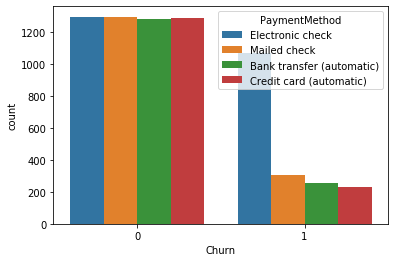

In [59]:
sns.countplot(x='Churn',hue='PaymentMethod',data=telecom)

In [60]:
churn=telecom[telecom['Churn']==1]
not_churn=telecom[telecom['Churn']==0]

In [61]:
churn.shape

(1869, 20)

In [62]:
not_churn.shape

(5163, 20)

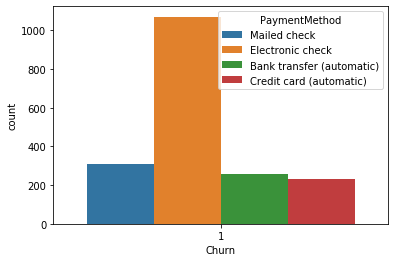

In [63]:
sns.countplot(x='Churn',hue='PaymentMethod',data=churn)

In [64]:
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)
telecom1 = pd.concat([telecom, dummy1],axis=1)

In [65]:
telecom1.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,...,29.85,0,0,0,0,1,0,0,0,0
1,Male,0,0,0,No,DSL,Yes,No,Yes,No,...,1889.50,0,1,0,0,0,1,1,0,0
2,Male,0,0,0,No,DSL,Yes,Yes,No,No,...,108.15,1,0,0,0,0,1,1,0,0
3,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,...,1840.75,0,1,0,0,0,0,1,0,0
4,Female,0,0,0,No,Fiber optic,No,No,No,No,...,151.65,1,0,0,0,1,0,0,1,0


In [66]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom1['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom1 = pd.concat([telecom1,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom1['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom1 = pd.concat([telecom1,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom1['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom1 = pd.concat([telecom1,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom1['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom1 = pd.concat([telecom1,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom1['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom1 = pd.concat([telecom1,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom1['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom1 = pd.concat([telecom1,sm1], axis=1)

In [67]:
telecom1 = telecom1.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [68]:
telecom1.shape

(7032, 29)

In [70]:
telecom1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 29 columns):
SeniorCitizen                            7032 non-null int64
Partner                                  7032 non-null int64
Dependents                               7032 non-null int64
tenure                                   7032 non-null int64
PhoneService                             7032 non-null int64
PaperlessBilling                         7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7032 non-null int64
Contract_One year                        7032 non-null uint8
Contract_Two year                        7032 non-null uint8
PaymentMethod_Credit card (automatic)    7032 non-null uint8
PaymentMethod_Electronic check           7032 non-null uint8
PaymentMethod_Mailed check               7032 non-null uint8
gender_Male                        

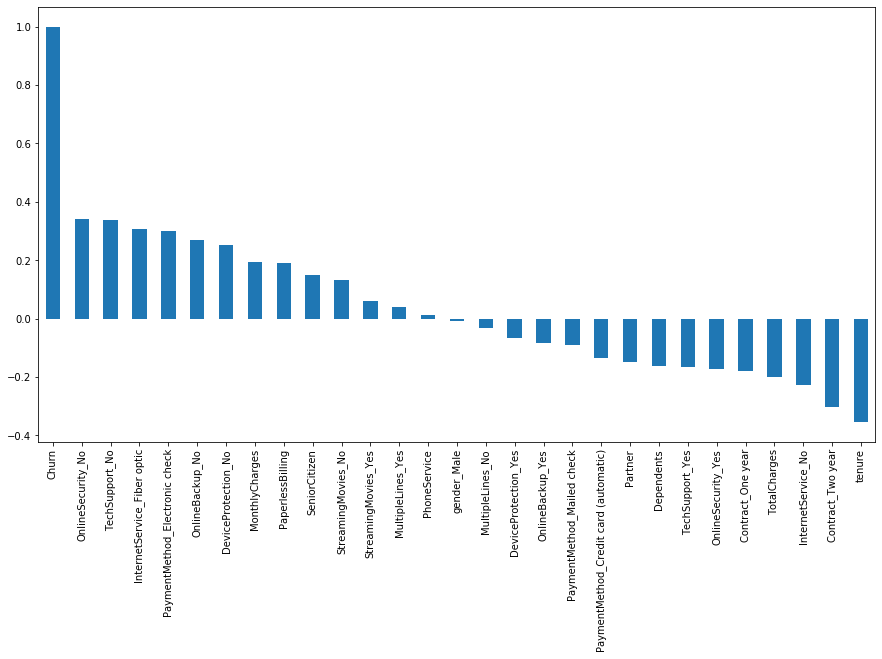

In [71]:
plt.figure(figsize=(15,8))
telecom1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

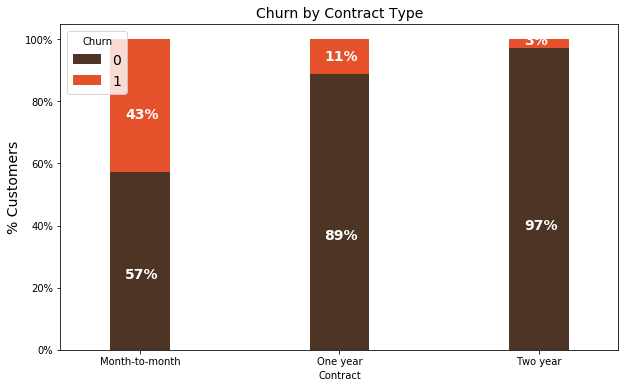

In [73]:
import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
contract_churn = telecom.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

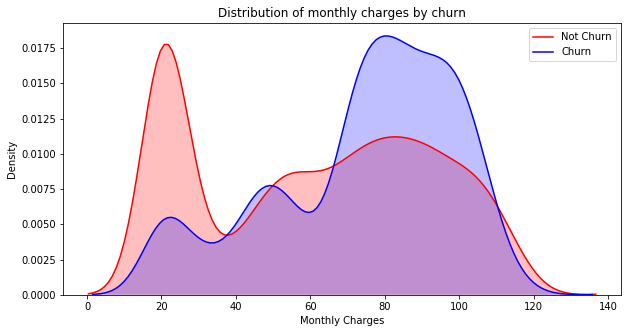

In [75]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(telecom.MonthlyCharges[(telecom["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom.MonthlyCharges[(telecom["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of total charges by churn')

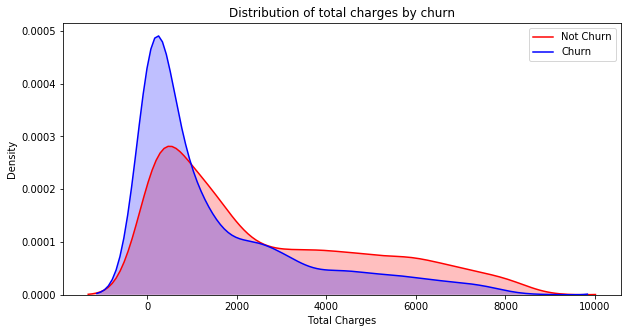

In [77]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(telecom.TotalCharges[(telecom["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom.TotalCharges[(telecom["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x=telecom1.drop('Churn',axis=1)
y=telecom1.Churn

In [102]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [103]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [104]:
X_train=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

In [136]:
lgr=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=50)
svc=SVC()
dtree=DecisionTreeClassifier()
random=RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
xgbc=xgb.XGBClassifier()
ada=AdaBoostClassifier()

In [107]:
lgr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
lgr_pred=lgr.predict(X_test)

In [109]:
from sklearn import metrics

In [110]:
print(metrics.classification_report(y_test,lgr_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1528
           1       0.66      0.57      0.61       582

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.79      0.80      0.79      2110



In [111]:
metrics.confusion_matrix(y_test,lgr_pred)

array([[1356,  172],
       [ 253,  329]], dtype=int64)

AxesSubplot(0.125,0.125;0.775x0.755)


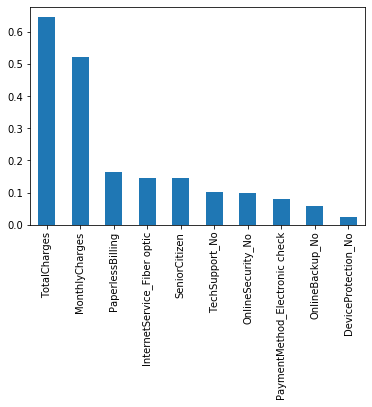

In [113]:
weights = pd.Series(lgr.coef_[0],
                 index=x.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


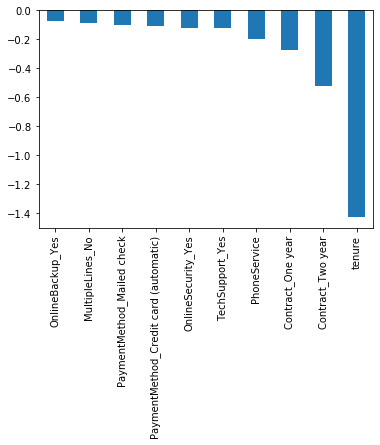

In [116]:
weights = pd.Series(lgr.coef_[0],
                 index=x.columns.values)
print (weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [117]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [118]:
knn_pred=knn.predict(X_test)

In [120]:
print(metrics.classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1528
           1       0.62      0.55      0.58       582

    accuracy                           0.78      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.78      0.78      0.78      2110



In [121]:
metrics.confusion_matrix(y_test,knn_pred)

array([[1327,  201],
       [ 259,  323]], dtype=int64)

In [122]:
svc.fit(X_test,y_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [123]:
svc_pred=svc.predict(X_test)

In [124]:
print(metrics.classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1528
           1       0.74      0.58      0.65       582

    accuracy                           0.83      2110
   macro avg       0.80      0.75      0.77      2110
weighted avg       0.82      0.83      0.82      2110



In [126]:
metrics.confusion_matrix(y_test,svc_pred)

array([[1408,  120],
       [ 244,  338]], dtype=int64)

In [127]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [128]:
dtree_pred=dtree.predict(X_test)

In [129]:
print(metrics.classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1528
           1       0.50      0.49      0.50       582

    accuracy                           0.73      2110
   macro avg       0.66      0.65      0.65      2110
weighted avg       0.72      0.73      0.72      2110



In [132]:
metrics.confusion_matrix(y_test,dtree_pred)

array([[1246,  282],
       [ 297,  285]], dtype=int64)

In [137]:
random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=False)

In [138]:
random_pred=random.predict(X_test)

In [139]:
print(metrics.classification_report(y_test,random_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1528
           1       0.68      0.49      0.57       582

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [140]:
metrics.confusion_matrix(y_test,random_pred)

array([[1393,  135],
       [ 295,  287]], dtype=int64)

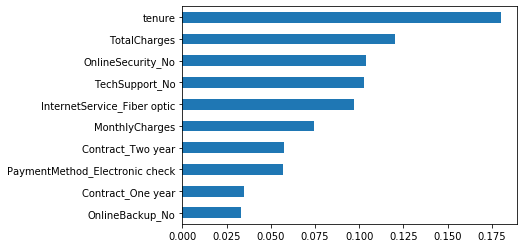

In [141]:
importances = random.feature_importances_
weights = pd.Series(importances,
                 index=x.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')